# 📋 Jupyter Notebook Quick Shortcuts (Markdown cell)
# Press 'H' in command mode to view all shortcuts
# 
# **Command Mode** (press Esc to enter):
# - A: Insert cell above
# - B: Insert cell below
# - D D: Delete current cell
# - Z: Undo delete
# - M: Change cell to Markdown
# - Y: Change cell to Code
# - Shift + Enter: Run cell and go to next
# - Ctrl + Enter: Run cell (stay on it)
#
# **Edit Mode** (press Enter to enter):
# - Tab: Auto-complete
# - Shift + Tab: Show function hint
# - Ctrl + /: Comment/uncomment line


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import graphviz
from IPython.display import display
import matplotlib.pyplot as plt

# Updated column names to match the dataset
column_names = [
    "ID", "N_Days", "Status", "Drug", "Age", "Sex", "Ascites", "Hepatomegaly", "Spiders", "Edema",
    "Bilirubin", "Cholesterol", "Albumin", "Copper", "Alk_Phos", "SGOT", "Tryglicerides", "Platelets",
    "Prothrombin", "Stage"
]

# Load the dataset
df = pd.read_csv("Third dataset/cirrhosis.csv", names=column_names, header=0, na_values=['NA'])

# Identify categorical and numerical columns
categorical_cols = ['Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']
numerical_cols = ['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
                  'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage']

# Impute missing values
# - For numerical columns: fill missing values with mean
for col in numerical_cols:
    df[col] = df[col].fillna(df[col].mean())

# - For categorical columns: fill missing values with mode
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# Drop 'ID' column (not useful for learning)
df = df.drop('ID', axis=1)

# One-hot encode categorical columns
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Check the processed dataframe
print(df_encoded)
print(df_encoded["Status_C"]

     N_Days    Age  Bilirubin  Cholesterol  Albumin      Copper     Alk_Phos  \
0       400  21464       14.5   261.000000     2.60  156.000000  1718.000000   
1      4500  20617        1.1   302.000000     4.14   54.000000  7394.800000   
2      1012  25594        1.4   176.000000     3.48  210.000000   516.000000   
3      1925  19994        1.8   244.000000     2.54   64.000000  6121.800000   
4      1504  13918        3.4   279.000000     3.53  143.000000   671.000000   
..      ...    ...        ...          ...      ...         ...          ...   
413     681  24472        1.2   369.510563     2.96   97.648387  1982.655769   
414    1103  14245        0.9   369.510563     3.83   97.648387  1982.655769   
415    1055  20819        1.6   369.510563     3.42   97.648387  1982.655769   
416     691  21185        0.8   369.510563     3.75   97.648387  1982.655769   
417     976  19358        0.7   369.510563     3.29   97.648387  1982.655769   

           SGOT  Tryglicerides  Platele

In [2]:
# drop bỏ cái cột target
X = df.drop("species", axis=1)
# bảng mỗi cột target
y = df["species"]

from sklearn.model_selection import train_test_split

split_ratios = [0.4, 0.6, 0.8, 0.9]
datasets = {}

for ratio in split_ratios:
    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        test_size=1-ratio,
        shuffle=True,
        stratify=y,
        random_state=42
    )
    # lưu dữ liệu vào data set
    # ví dụ  0.4_0.6 là tỉ lệ 40% train và 60% test
    key = f"{int(ratio * 100 + 0.001)}_{int((1 - ratio + 0.001) * 100)}" 
    # cộng với 0.001 để tránh làm tròn xuống =))
    datasets[f"feature_train_{key}"] = X_train
    datasets[f"label_train_{key}"] = y_train
    datasets[f"feature_test_{key}"] = X_test
    datasets[f"label_test_{key}"] = y_test

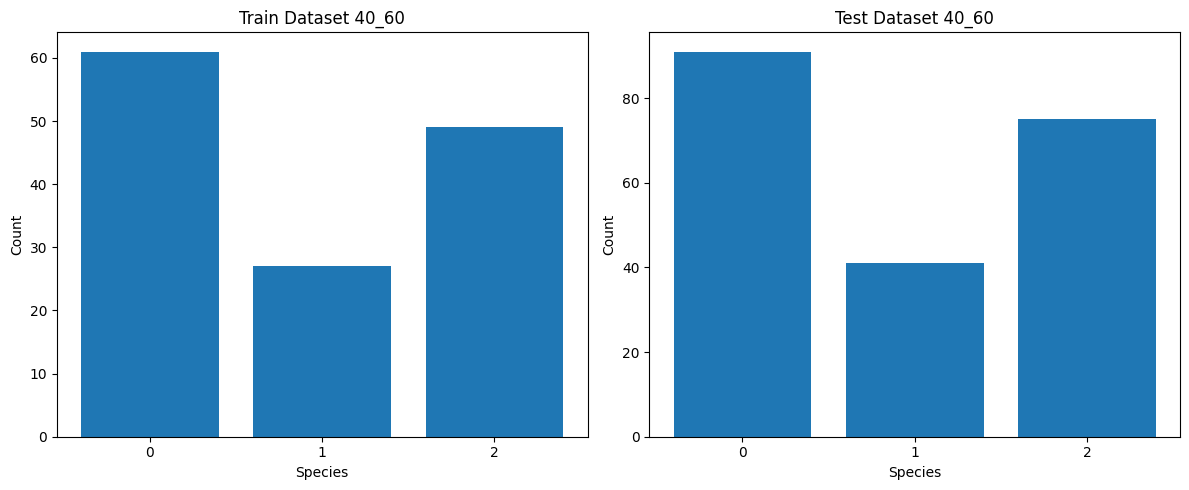

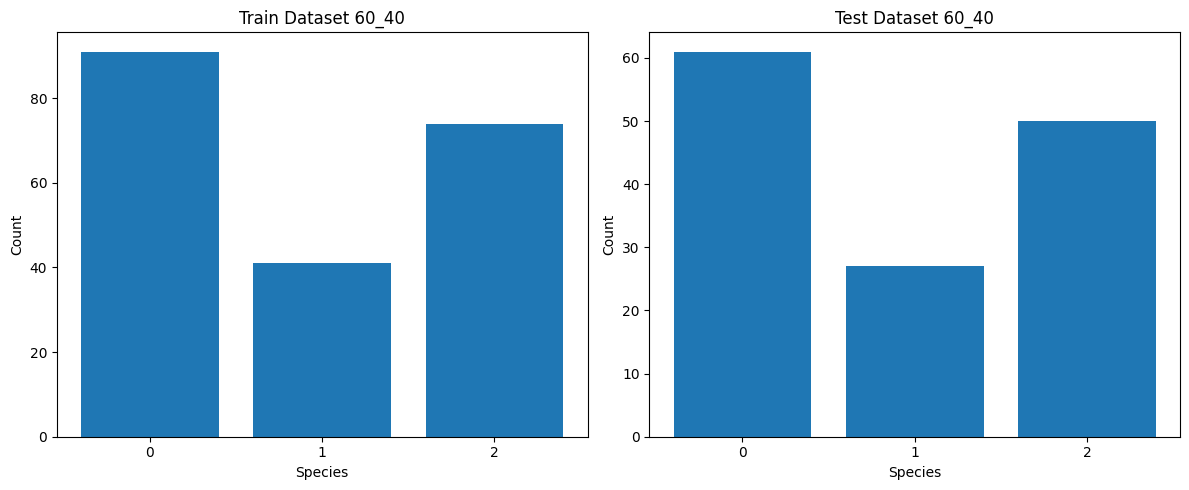

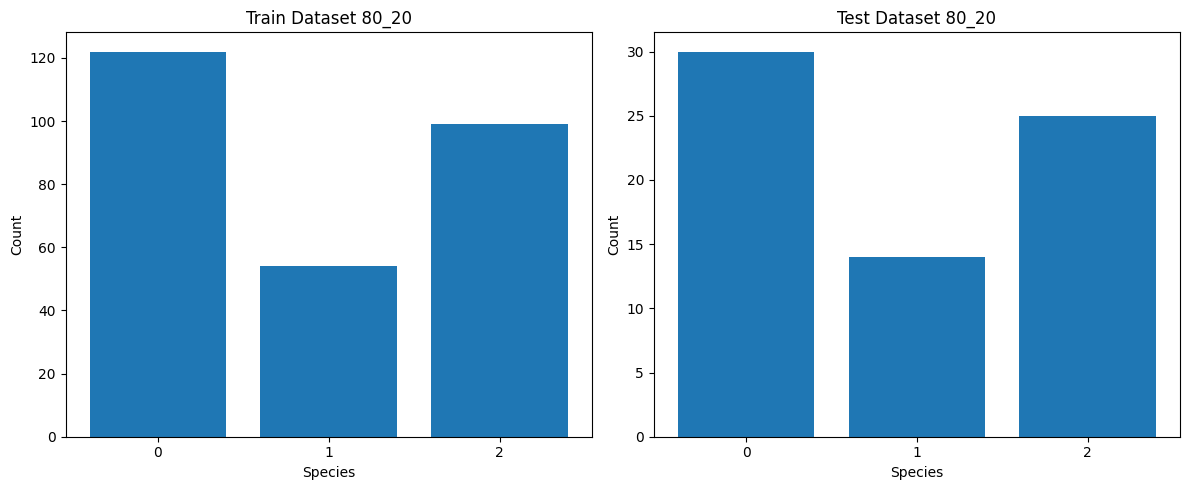

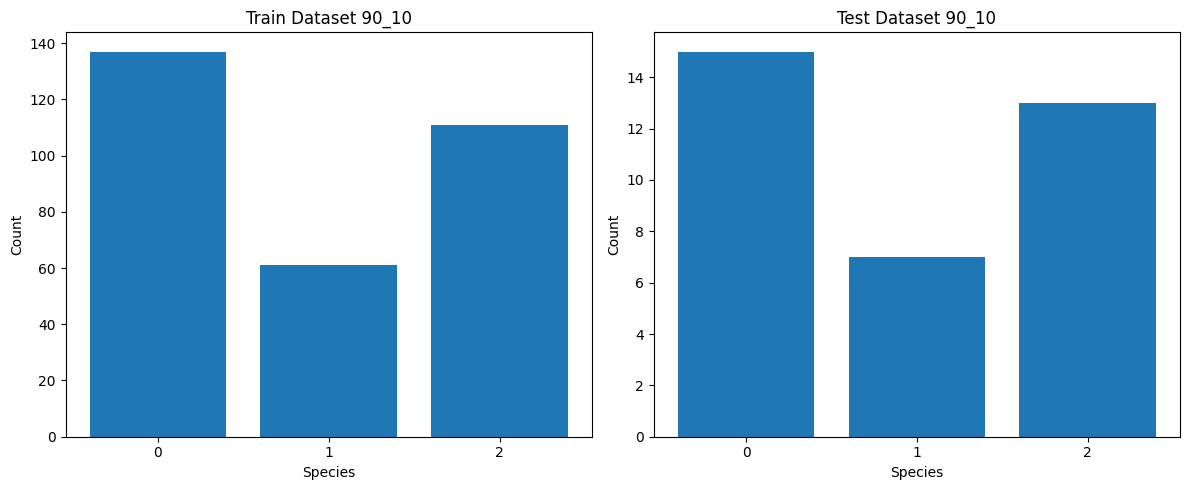

In [3]:
import matplotlib.pyplot as plt

def plot_distribution(y_train, y_test, title_train, title_test):
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # Create a figure with 1 row and 2 columns

    # Plot for the training set
    counts_train = y_train.value_counts().sort_index()
    labels_train = counts_train.index
    values_train = counts_train.values
    axes[0].bar(labels_train, values_train)
    axes[0].set_title(title_train)
    axes[0].set_xlabel("Species")
    axes[0].set_ylabel("Count")
    axes[0].set_xticks([0, 1, 2])

    # Plot for the test set
    counts_test = y_test.value_counts().sort_index()
    labels_test = counts_test.index
    values_test = counts_test.values
    axes[1].bar(labels_test, values_test)
    axes[1].set_title(title_test)
    axes[1].set_xlabel("Species")
    axes[1].set_ylabel("Count")
    axes[1].set_xticks([0, 1, 2])

    plt.tight_layout()  # Adjust the layout
    plt.show()  # Display the plots

# Visualize for the full dataset
# plot_distribution(y, y, "Full Dataset Train", "Full Dataset Test")

# Visualize for each split
for ratio in split_ratios:
    key = f"{int(ratio * 100 + 0.001)}_{int((1 - ratio + 0.001) * 100)}"
    plot_distribution(datasets[f"label_train_{key}"], datasets[f"label_test_{key}"], f"Train Dataset {key}", f"Test Dataset {key}")

In [4]:
from sklearn.tree import DecisionTreeClassifier

# Store the decision trees for each split
decision_trees = {}

# Loop through each train/test split
for ratio in split_ratios:
    # Create the key (example: 40_60, 60_40, etc.)
    key = f"{int(ratio * 100 + 0.001)}_{int((1 - ratio + 0.001) * 100)}"
    
    # Get feature_train and label_train
    X_train = datasets[f"feature_train_{key}"]
    y_train = datasets[f"label_train_{key}"]

    # Create and train the Decision Tree
    clf = DecisionTreeClassifier(criterion="entropy", random_state=42)
    clf.fit(X_train, y_train)
    decision_trees[f"decision_tree_{key}"] = clf


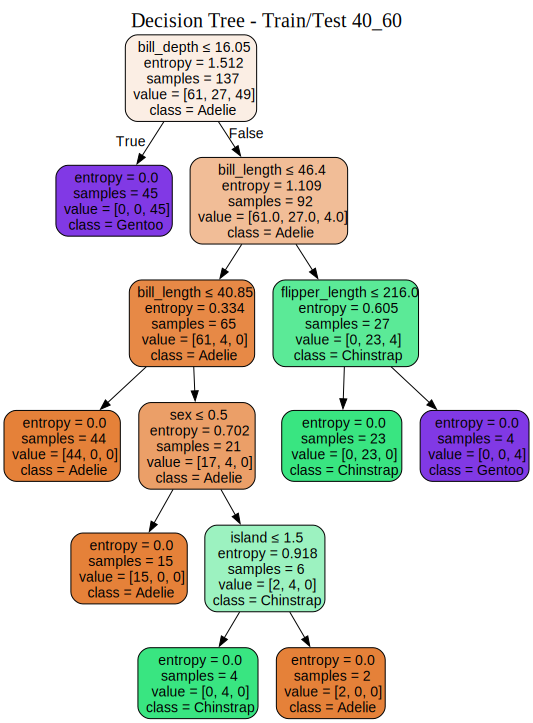

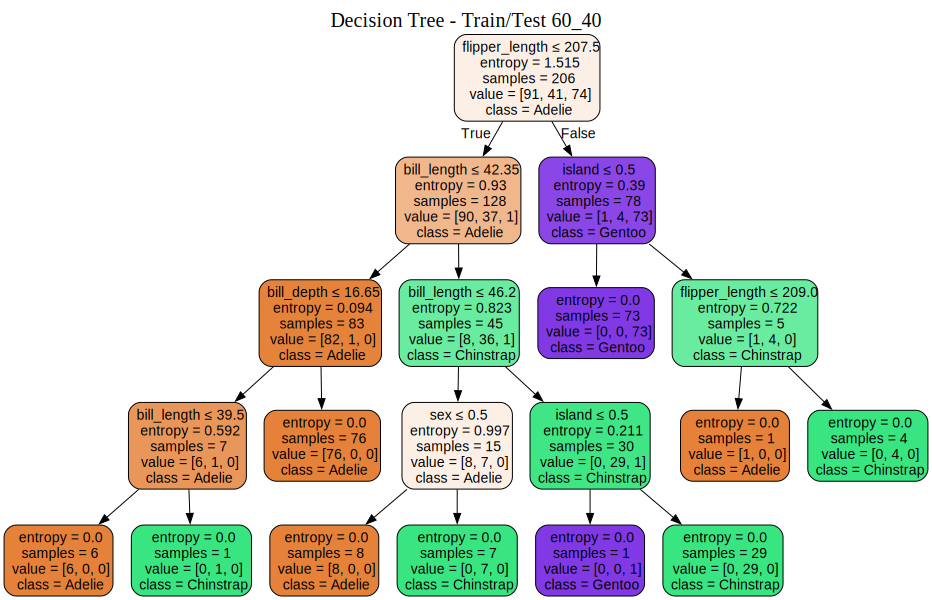

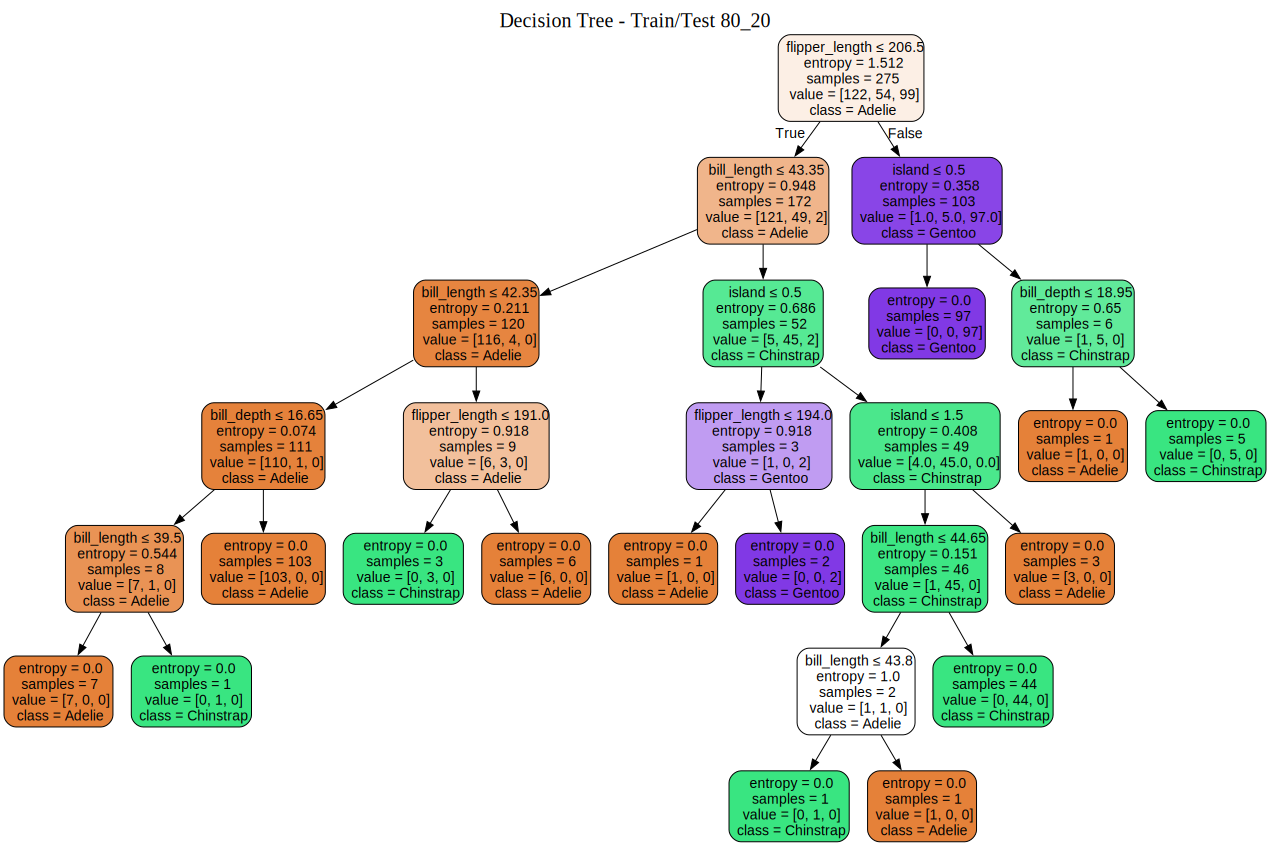

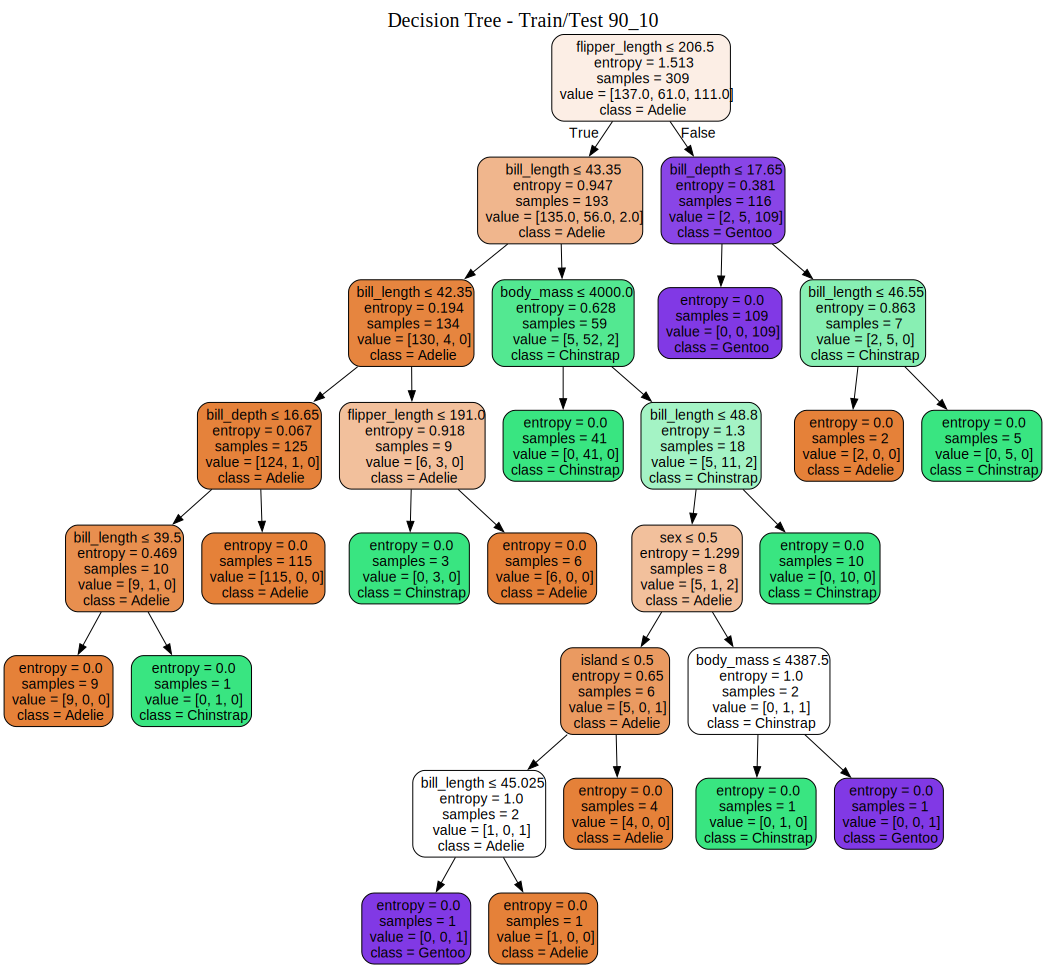

In [5]:
from sklearn.tree import export_graphviz
import graphviz
from IPython.display import display

for ratio in split_ratios:
    # Create the key (example: 40_60, 60_40, etc.)
    key = f"{int(ratio * 100 + 0.001)}_{int((1 - ratio + 0.001) * 100)}"
    
    # Get feature_train and label_train
    X_train = datasets[f"feature_train_{key}"]
    clf_train = decision_trees[f"decision_tree_{key}"]
    
    # Export the decision tree to DOT format, adding a name
    dot_data = export_graphviz(
        clf_train,  
        feature_names=X_train.columns, 
        class_names=["Adelie", "Chinstrap", "Gentoo"], 
        filled=True, 
        rounded=True,
        special_characters=True,
        out_file=None,
    )
    
    dot_data = dot_data.replace(
        'digraph Tree {',
        f'digraph Tree {{\nlabel="Decision Tree - Train/Test {key}";\nlabelloc=top;\nfontsize=20;'
    )    
    # Render the decision tree using Graphviz
    
    graph = graphviz.Source(dot_data)
    display(graph)


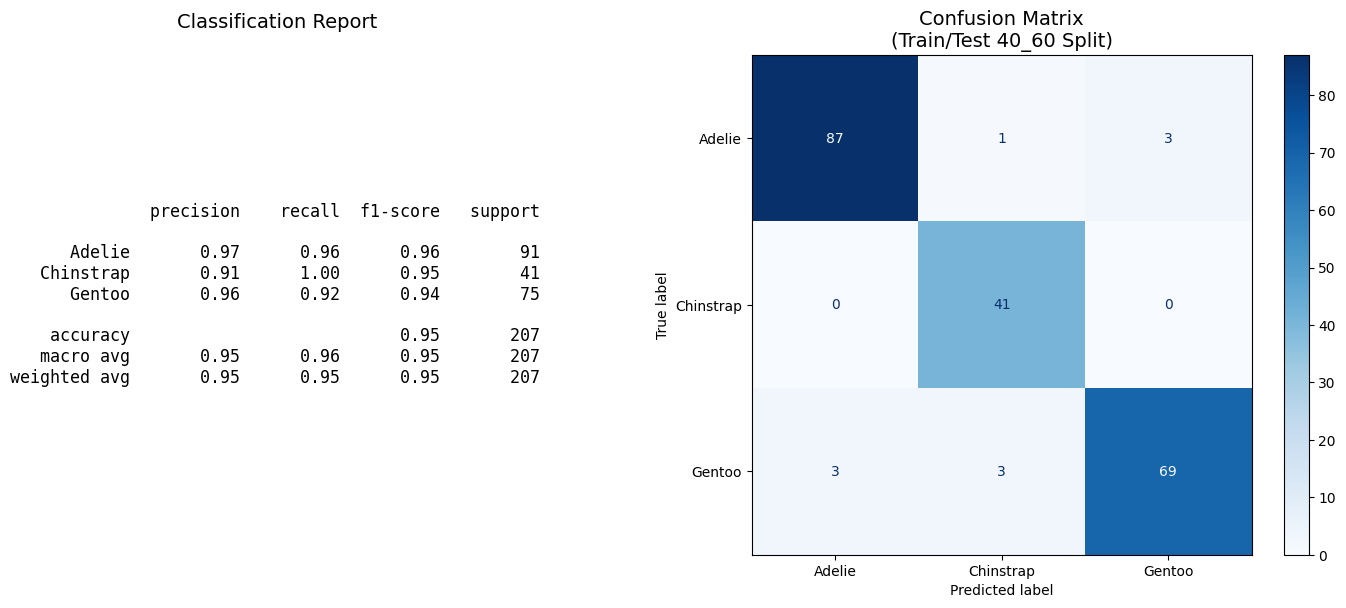

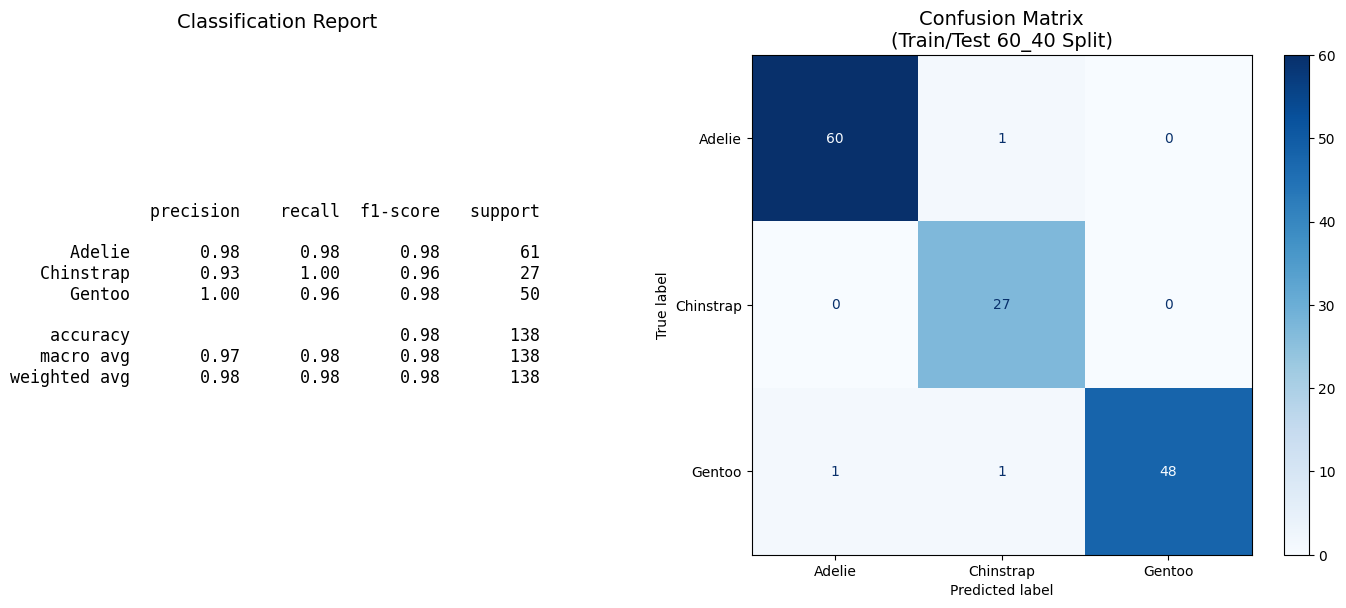

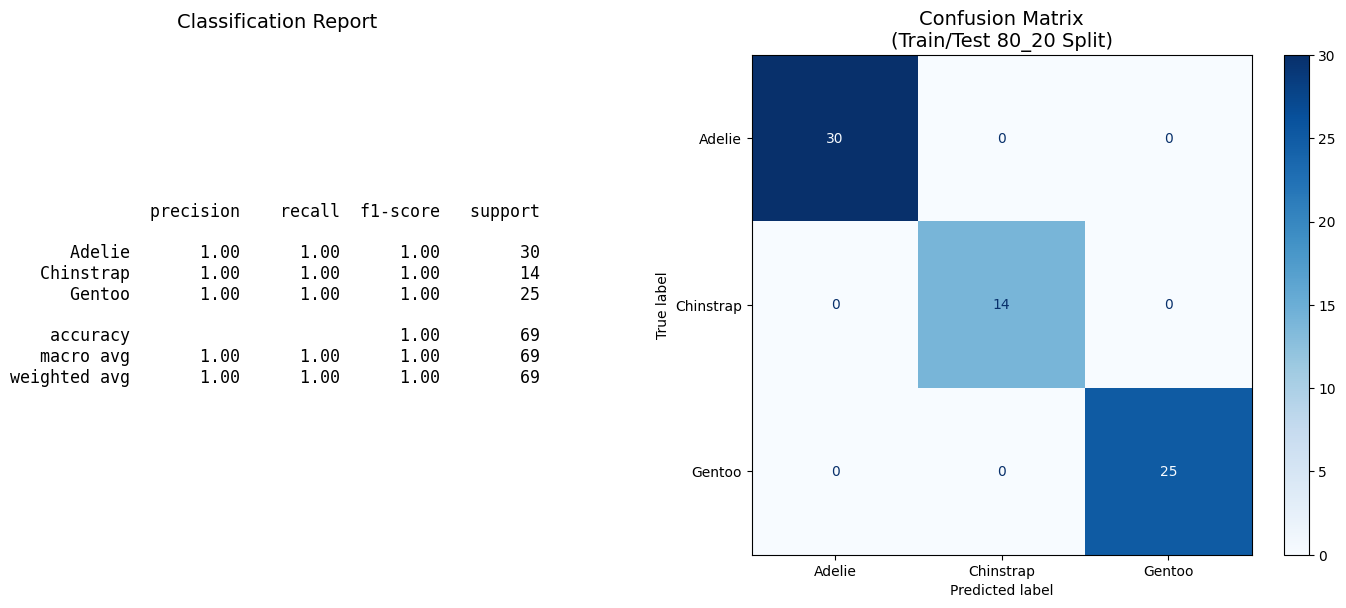

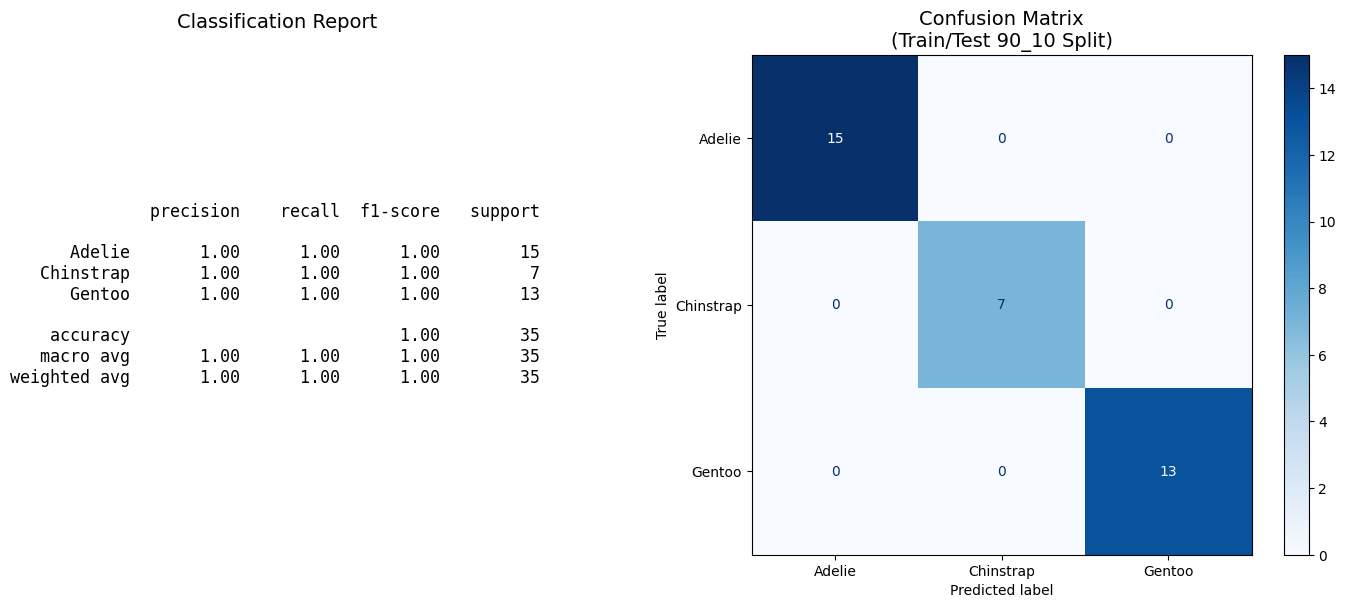

In [6]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

for ratio in split_ratios:
    # Create key like 80_20
    key = f"{int(ratio * 100 + 0.001)}_{int((1 - ratio + 0.001) * 100)}"
    
    # Load test data
    X_test = datasets[f"feature_test_{key}"]
    y_test = datasets[f"label_test_{key}"]
    
    # Load trained classifier
    clf = decision_trees[f"decision_tree_{key}"]
    
    # Predict
    y_pred = clf.predict(X_test)
    
    # Classification report as text
    report_text = classification_report(y_test, y_pred, target_names=["Adelie", "Chinstrap", "Gentoo"])
    # print(f"\nClassification Report (Train/Test {key} Split):\n")
    # print(report_text)
    
    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Plot side-by-side: Classification Report (left) and Confusion Matrix (right)
    fig, axes = plt.subplots(1, 2, figsize=(14, 6), gridspec_kw={'width_ratios': [1, 1.2]})
    
    # Plot classification report text on the left
    axes[0].axis('off')  # Turn off the axes
    axes[0].text(0, 0.5, report_text, fontsize=12, ha='left', va='center', wrap=True, family='monospace')
    axes[0].set_title("Classification Report", fontsize=14, pad=20)
    
    # Plot confusion matrix on the right
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Adelie", "Chinstrap", "Gentoo"])
    disp.plot(cmap='Blues', ax=axes[1], colorbar=True)
    axes[1].set_title(f"Confusion Matrix\n(Train/Test {key} Split)", fontsize=14)
    
    plt.tight_layout()
    plt.show()


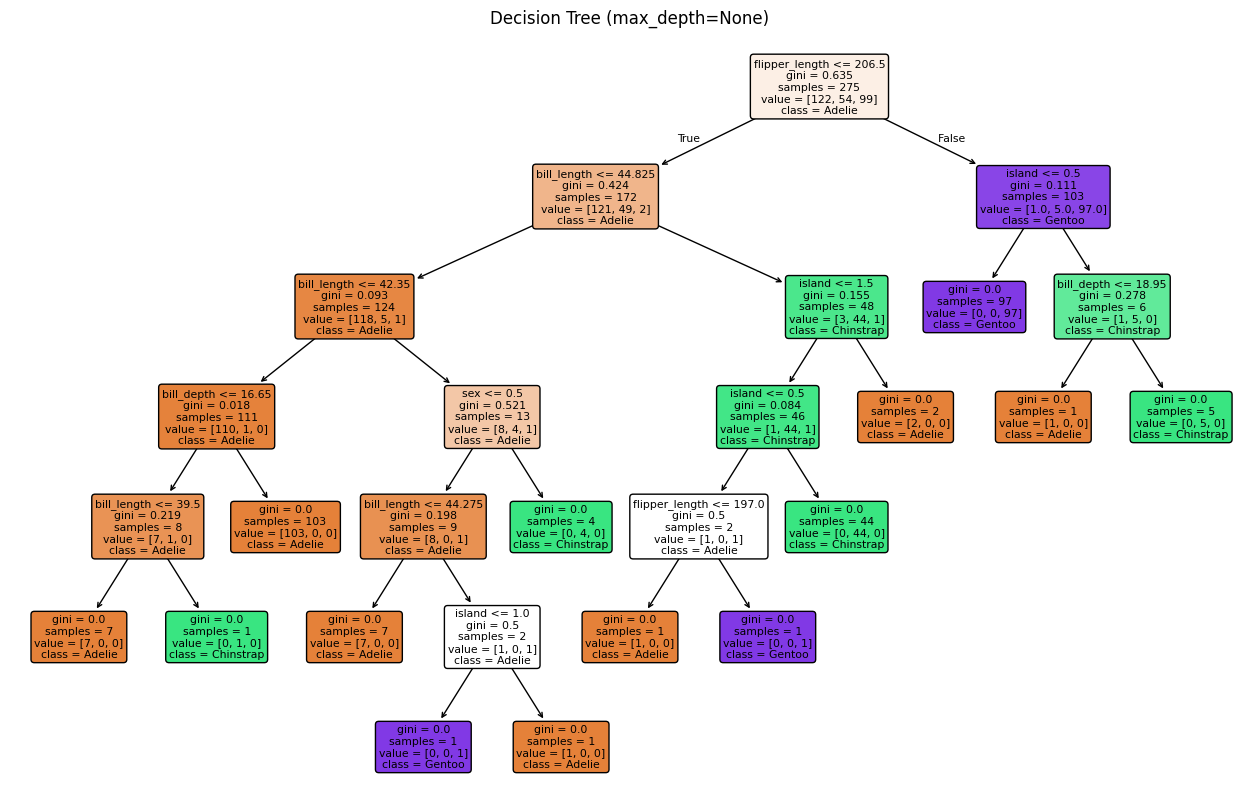

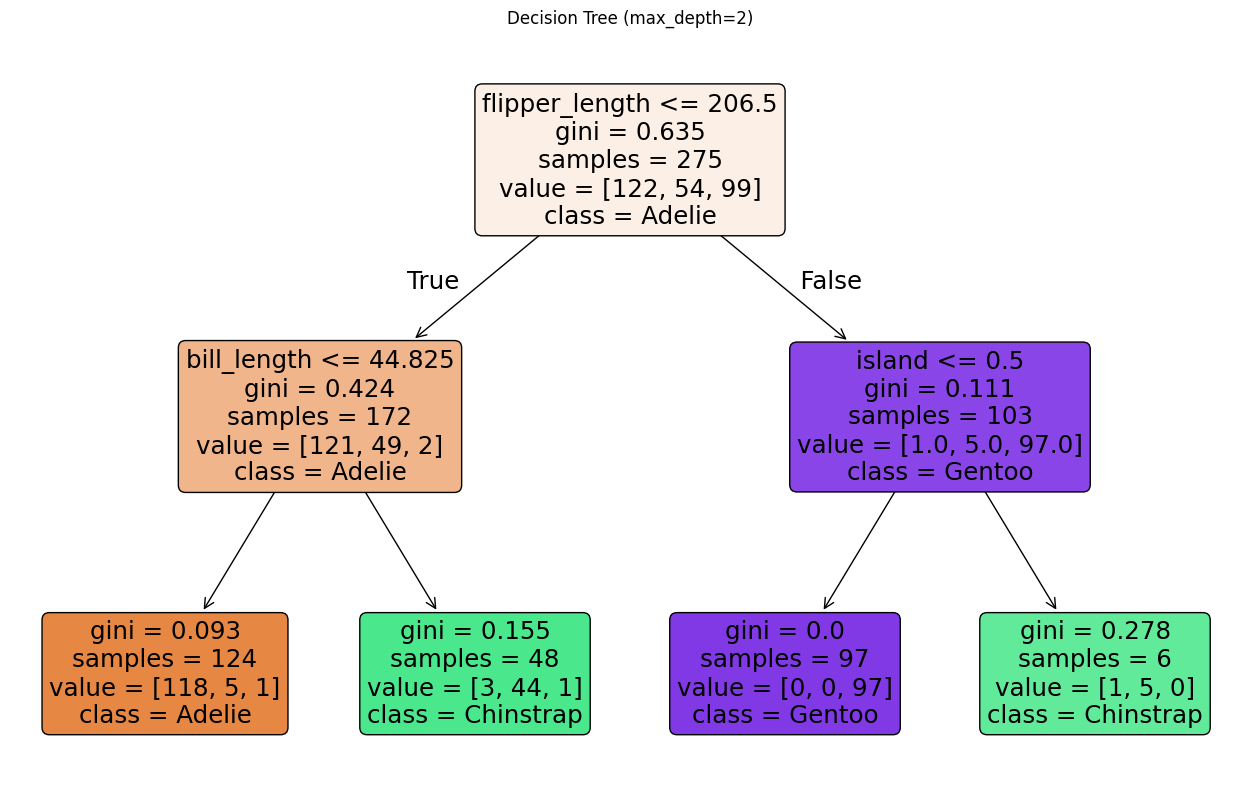

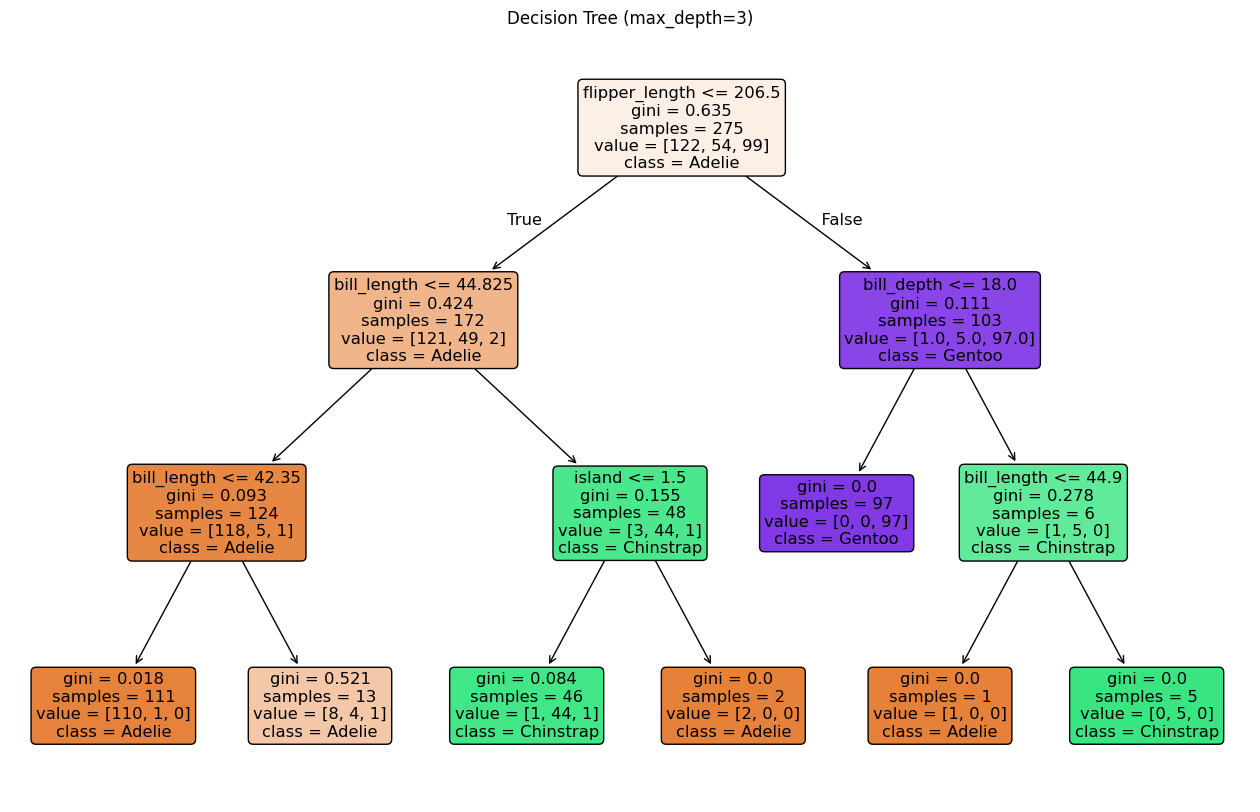

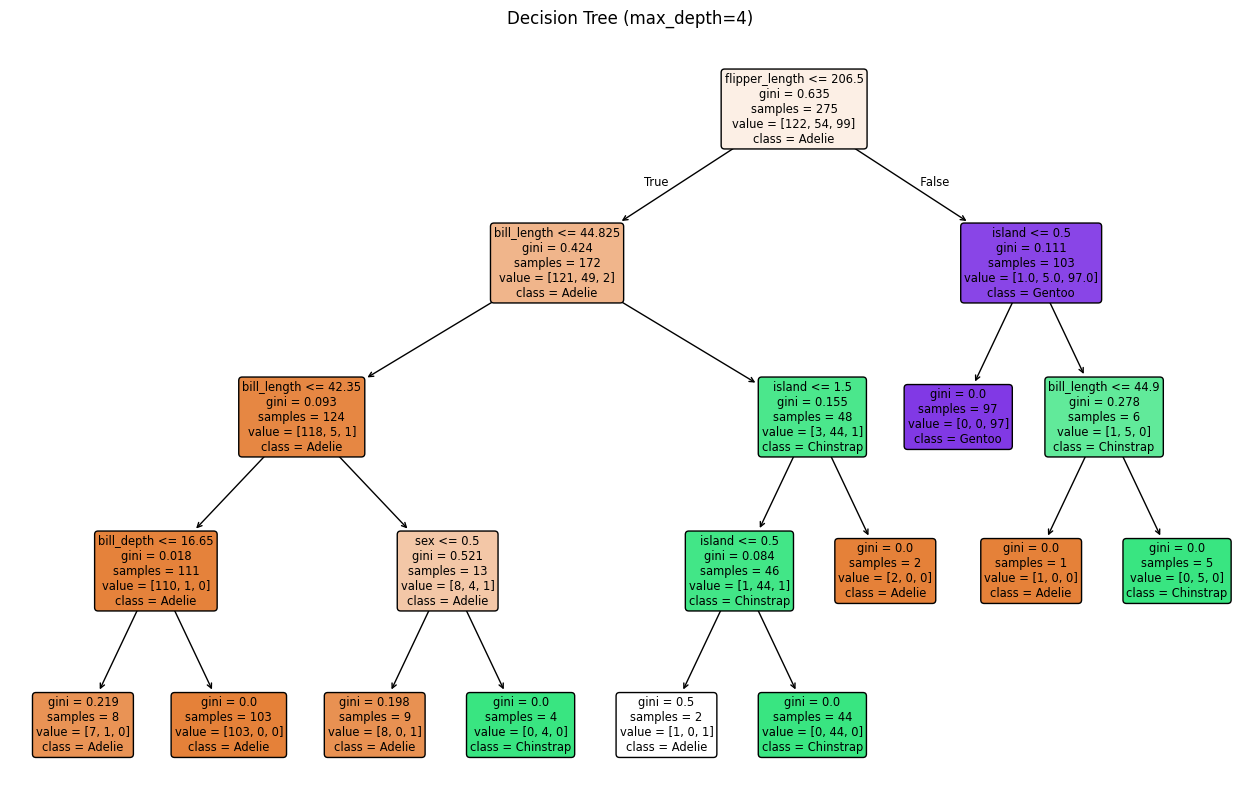

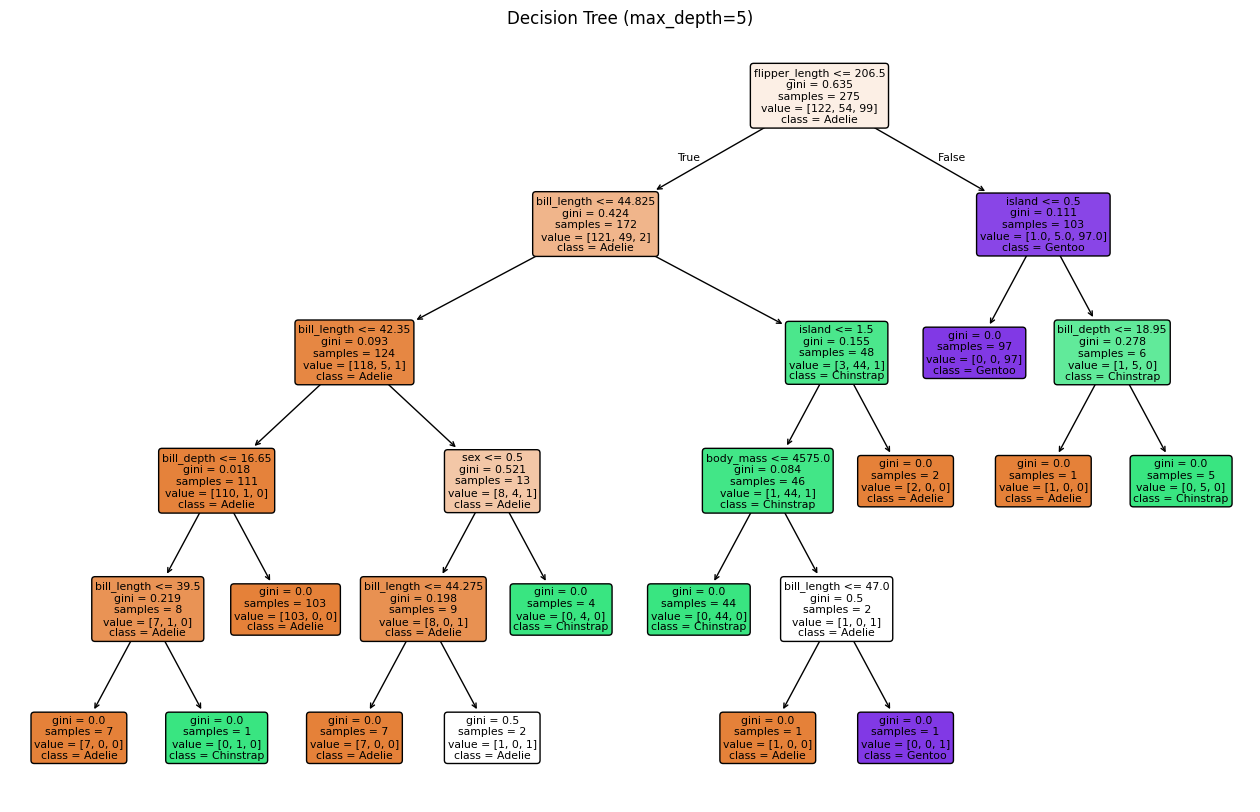

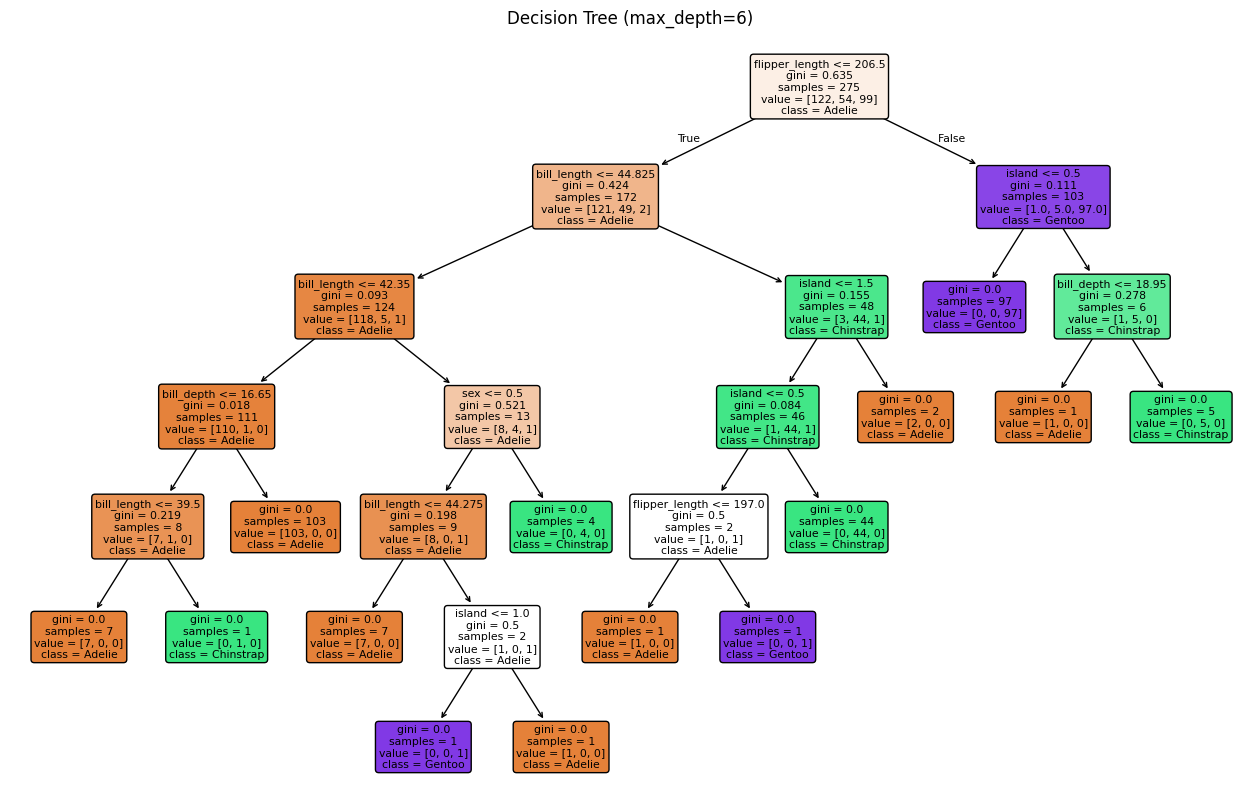

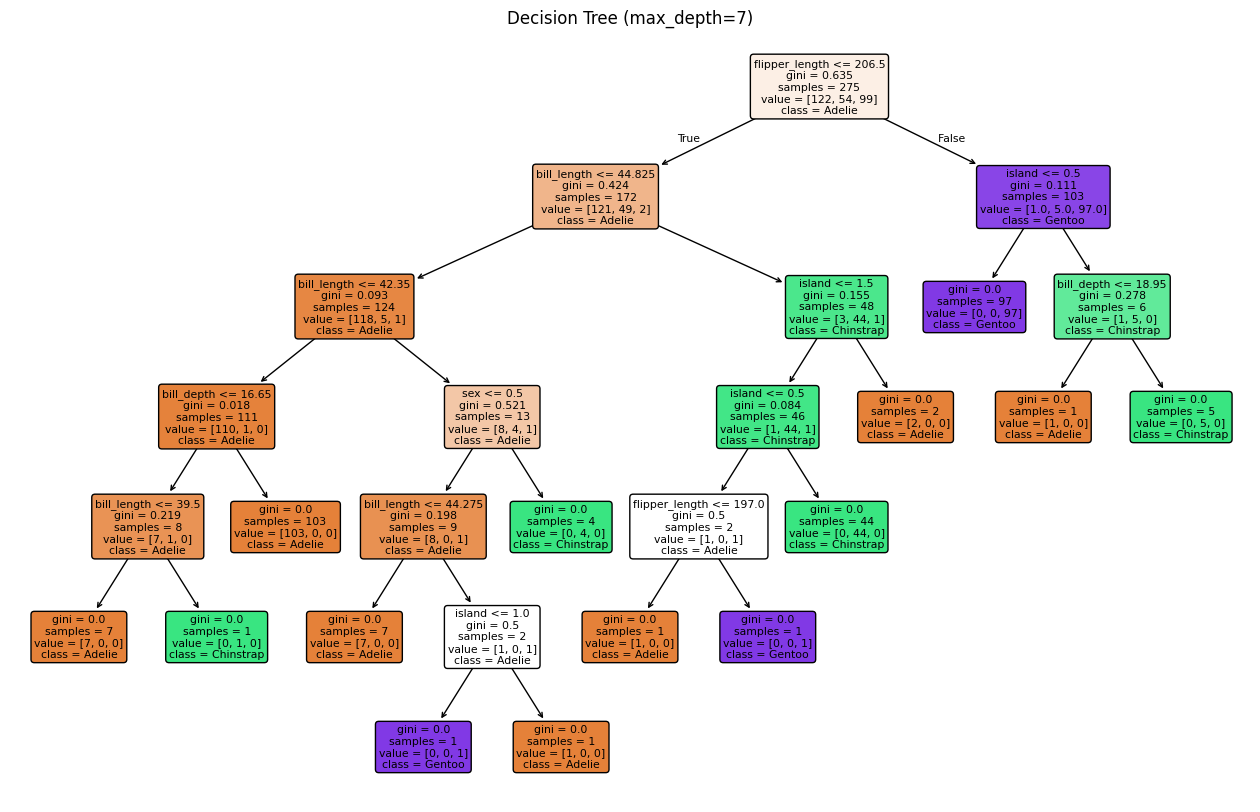


Accuracy Results:
max_depth	Accuracy
None		1.0000
2		0.9710
3		0.9710
4		1.0000
5		1.0000
6		1.0000
7		1.0000


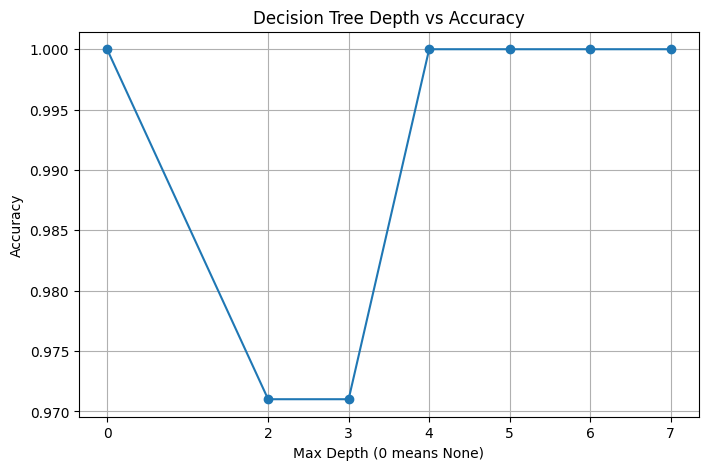

In [7]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Assuming your 80/20 dataset is already prepared:
key = "80_20"
X_train = datasets[f"feature_train_{key}"]
y_train = datasets[f"label_train_{key}"]
X_test = datasets[f"feature_test_{key}"]
y_test = datasets[f"label_test_{key}"]

# Depths to try
depths = [None, 2, 3, 4, 5, 6, 7]

# Store results
accuracy_results = {}

for depth in depths:
    # Train decision tree
    clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    clf.fit(X_train, y_train)
    
    # Predict
    y_pred = clf.predict(X_test)
    
    # Evaluate
    acc = accuracy_score(y_test, y_pred)
    depth_label = "None" if depth is None else str(depth)
    accuracy_results[depth_label] = acc
    
    # Plot tree
    plt.figure(figsize=(16, 10))
    plot_tree(clf, filled=True, feature_names=X_train.columns, class_names=["Adelie", "Chinstrap", "Gentoo"], rounded=True)
    plt.title(f"Decision Tree (max_depth={depth_label})")
    plt.show()

# Show accuracy table
print("\nAccuracy Results:")
print("max_depth\tAccuracy")
for depth_label, acc in accuracy_results.items():
    print(f"{depth_label}\t\t{acc:.4f}")

# Plot depth vs accuracy
plt.figure(figsize=(8, 5))
depth_labels = list(accuracy_results.keys())
acc_values = list(accuracy_results.values())

# For x-axis, handle 'None' separately
x_labels = [0 if d == "None" else int(d) for d in depth_labels]
plt.plot(x_labels, acc_values, marker='o')
plt.xticks(x_labels)
plt.xlabel('Max Depth (0 means None)')
plt.ylabel('Accuracy')
plt.title('Decision Tree Depth vs Accuracy')
plt.grid(True)
plt.show()
